# Simple 2-layer Neural Network with Softmax Function
+ Simple 2-layer neural network with softmax function for multi-class classification.
+ Classify red ball, green ball or blue ball for a given 2D input data.

In [9]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib as mpl

eta = 0.03  # learning rate
epoch = 10000

### Softmax Function
+ Softmax function is a function that takes an input as a vector of real numbers, and normalizes it into a probability 
+ distribution for each element of vector. To each elment of an input vector, the standard exponential function is 
+ applied, which is nomalized by the sum of  exponential values of all the elements of the vector. 
+ For softmax function, x - max(x)  is used to avoid overflow of exponent function. 

In [10]:
def sigmoid(x):
    return 1.0/(1+ np.exp(-x))

def sigmoid_deriv(x):
    return x * (1.0 - x)

def softmax(x):
    # softmax   
    e = np.exp(x - np.max(x)) # x-m is used to avoid overflow of exponent function
    return e / np.sum(e, axis=0) # add in column

### 2-layer Neural Network Model with Softmax Function
+ Softmax function is used at outputs of layer 2.
+ The delta of output layer using softmax function is output - target.
+ Total error is also obtained by summing up the individual error and averaging them. 
+ For more details on the definition of delta function, refer to the class note.

In [11]:
class neuralnetwork:
    # neural network model
    
    def __init__(self, x, w1, w2, y):
        self.inputs   = x.T
        self.weights1 = w1
        self.weights2 = w2
        self.b1 = np.zeros((4,1)) # bias at hidden layer 
        self.b2 = np.zeros((3,1)) # bias at output layer 
        self.target   = y.T       # target
        self.output   = np.zeros(self.target.shape)

    def forwardprop(self):
        # forward processing of inputs and weights using sigmoid activation function
        self.hiddenout = sigmoid(np.dot(self.weights1, self.inputs) + self.b1)
        self.output = softmax(np.dot(self.weights2, self.hiddenout) + self.b2)

    def backprop(self):
        # backward processing of appling the chain rule to find derivative of the loss function with respect to weights
        delta2 = (self.output - self.target)  
        delta1 = np.dot(self.weights2.T, delta2) * sigmoid_deriv(self.hiddenout)
        dw2 = np.dot(delta2, self.hiddenout.T)
        dw1 = np.dot(delta1, self.inputs.T)

        # update the weights with the derivative of the loss function
        self.weights1 -= eta * dw1 / batchsize
        self.weights2 -= eta * dw2 / batchsize

        # update biases with the derivative of the loss function
        self.b2 -= eta * np.sum(delta2, axis = 1, keepdims=True) / batchsize # add in row axis, keeping column dimension
        self.b1 -= eta * np.sum(delta1, axis = 1, keepdims=True) / batchsize # add in row axis, keeping column dimension

    def predict(self, x):
        # predict the output for a given input x
        self.hiddenout = sigmoid(np.dot(self.weights1, x) + self.b1)
        self.output = softmax(np.dot(self.weights2, self.hiddenout) + self.b2)
        return (self.output)

    def calculate_error(self):               
        # calculate error
        error = np.sum(-self.target * np.log(self.output)) # cross entropy loss function for multi-class classification
        return error
    
    def calculate_accuracy(self):
        # calculate accuracy
        target_label = np.argmax(self.target.T, axis = 1)
        output_label = np.argmax(self.output.T, axis = 1)
        accuracy = 100 * np.sum(target_label == output_label) / float(self.target.T.shape[0])
        return accuracy

### Data Set
+ For simplicity, it is assumed that the color of ball can be identified with two features, i.e., x_axis and y_axis values.
+ (x, y) values of red, green and blue balls are centered around (0, -3), (3, 3) and (-3, 3), respectively.
+ Target values for red, green and blue balls are [1, 0, 0], [0, 1, 0] and [0, 0, 1], respectively.
+ Formats of input data and targetvalue are shown below, which are basically lists of row vectors.
+ In program, these data are converted to column vectors.
+
+  input data = 
+ $\;\;\;\;$[[0.1,0.3],  # input data item1
+ $\;\;\;\;$[0.5,0.8],  # input data item2
+ $\;\;\;\;$[0.7,0.6],  # input data item3
+ $\;\;\;\;$[0.9,0.2]] # input data item4
+   
+  target data = 
+ $\;\;\;\;$[[0,1,0],  # target1, one-hot vector representation
+  $\;\;\;\;$[1,0,0],  # target2, one-hot vector representation
+  $\;\;\;\;$[0,0,1],  # target3, one-hot vector representation
+  $\;\;\;\;$[1,0,0]]  # target4, one-hot vector representation

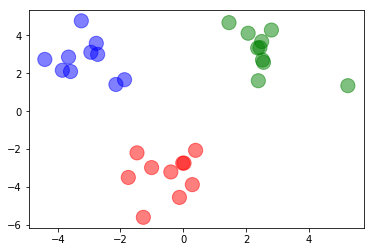

In [12]:
if __name__ == "__main__":

    # get training data set
    samples = 10
    attributes = 2
    classes = 3
    
    np.random.seed(45)
    data1_set = np.random.randn(samples, attributes) + np.array([0, -3])  # red ball
    data2_set = np.random.randn(samples, attributes) + np.array([3,  3])  # green ball
    data3_set = np.random.randn(samples, attributes) + np.array([-3, 3])  # blue ball
   
    feature_set = np.vstack([data1_set, data2_set, data3_set])   
    labels = np.array([0]*samples + [1]*samples + [2]*samples)

    # Initializing colors and building a colormap
    cmap = mpl.colors.ListedColormap(['red', 'green', 'blue'])

    # display data training data set
    plt.scatter(feature_set[:,0], feature_set[:,1], c=labels, cmap =cmap, s= 200, alpha=0.5)  
    plt.show()

    one_hot_labels = np.zeros((samples*classes, classes))
    
    for i in range(samples*classes):  
        one_hot_labels[i, labels[i]] = 1

    inputdata = feature_set
    targetvalue = one_hot_labels
    batchsize = inputdata.shape[0]

### Batch Gradient Descent Optimization
+ All the input data are processed in batch at both forward and backward propagations.
+ In comparison with SGD, batch GD optimizes more smoothly since the weights update are performed in batch.

In [13]:
    w2 = np.random.rand(3, 4)     # number of output labels is 3
    w1 = np.random.rand(4, inputdata.shape[1])  # number of nodes at a hidden layer is 4

    nn = neuralnetwork(inputdata, w1, w2, targetvalue)

    training_loss = []  
    training_accuracy = []
  
    # training 
    for i in range(epoch):    
        nn.forwardprop()
        nn.backprop()
        if (i % 500) == 0:
            print("Error: ", nn.calculate_error())
            training_loss.append(nn.calculate_error())  # store training loss 
            training_accuracy.append(nn.calculate_accuracy()) #store training accuracy 
 
    print("target")   
    print(targetvalue)
    print("output after training")   
    print(nn.output.T)

    # predicting and testing the output for a given input data
    # For a given input data [1, -1], it is predicated as red ball since the output is [0, 1, 0], i.e. the red ball.
    x_prediction = np.array([[1.0, -1.0]])
    predicted_output = nn.predict(x_prediction.T)
    print("Predicted data based on trained weights: ")
    print("Input: ", x_prediction)
    print("Output: ", predicted_output.T)
    if np.argmax(predicted_output.T) == 0:
        print("it is red ball")
    elif np.argmax(predicted_output.T) == 1:
        print("it is green ball")
    elif np.argmax(predicted_output.T) == 2:
        print("it is blue ball")  

Error:  31.43868046889315
Error:  8.475412755528122
Error:  3.7168885133586067
Error:  2.29305056849325
Error:  1.6417464440483724
Error:  1.2736115381604451
Error:  1.038332736539918
Error:  0.8754727649700951
Error:  0.7562624097546887
Error:  0.6653267013305726
Error:  0.5937254652809217
Error:  0.5359149947122467
Error:  0.4882791310999299
Error:  0.44836050588896564
Error:  0.4144318471422493
Error:  0.38524415775757337
Error:  0.3598722247939759
Error:  0.3376162849614648
Error:  0.3179374221799383
Error:  0.30041394370894936
target
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
output after training
[[0.98892687 0.00514367 0.00592946]
 [0.98875946 0.00307544 0.0081651 ]


### Evaluation: Loss display

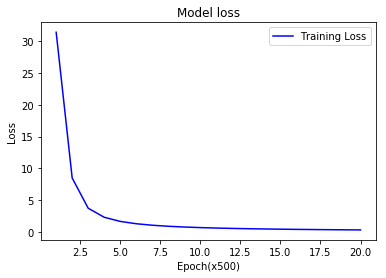

In [14]:
    # Create count of the number of epochs
    epoch_count = range(1, len(training_loss) + 1)
    # visualize model loss
    plt.plot(epoch_count, training_loss, 'b-')
    plt.title("Model loss")
    plt.legend(['Training Loss'])
    plt.xlabel('Epoch(x500)')
    plt.ylabel('Loss')
    plt.show()

### Evaluation: Accuracy display

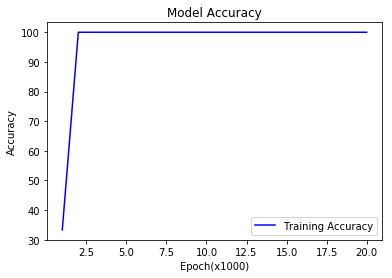

In [15]:
   # visualize model accuracy
    plt.plot(epoch_count, training_accuracy, 'b-')
    plt.title('Model Accuracy')
    plt.legend(['Training Accuracy'])
    plt.xlabel('Epoch(x1000)')
    plt.ylabel('Accuracy')
    plt.show()
